In [22]:
%matplotlib inline

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm
import astropy.visualization as vis
import luptonRGB
from PIL import Image

In [73]:
data=scipy.io.loadmat("cutouts_threedet_tracklets_303482")
cutouts=data["cutouts"]
Q=3
for i in range(len(cutouts)):
    if not np.isnan(np.sum(cutouts[i][0])):
        f, (ax1, ax2, ax3) = plt.subplots(1, 3) #figsize may introduce a computation time issue for large image sets
        
        template=cutouts[i][0]
        science=cutouts[i][1]
        difference=cutouts[i][2]
        template = luptonRGB.makeRGB(template,Q=Q)
        science = luptonRGB.makeRGB(science,Q=Q)
        difference = luptonRGB.makeRGB(difference,Q=Q)

        ax1.imshow(template,cmap=cm.viridis,interpolation="none")
        ax1.axis('off')
        ax2.imshow(science,cmap=cm.viridis,interpolation="none")
        ax2.axis('off')
        ax3.imshow(difference,cmap=cm.viridis,interpolation="none")
        ax3.axis('off')
        plt.tight_layout(pad=-0.5, w_pad=-1.5, h_pad=-1.5)
        plt.savefig('sub_sets/Asteroids/ast'+str(i)+'.jpg')
        plt.close()


luptonRGB.py:190: RuntimeWarning: invalid value encountered in less
  c[c < 0] = 0                # individual bands can still be < 0, even if fac isn't


KeyboardInterrupt: 

In [4]:
#template
#plt.imshow(cutouts[2][0],cmap=cm.viridis,interpolation="none")

In [5]:
#science
#plt.imshow(cutouts[2][1])

In [6]:
#difference
#plt.imshow(cutouts[2][2])

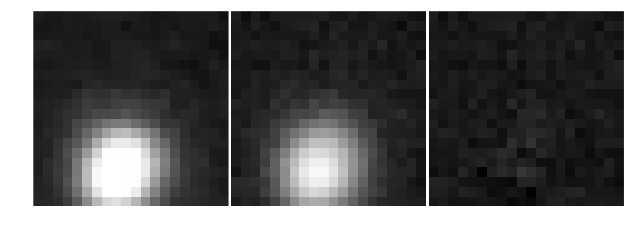

In [75]:
#Scale arrays individually and then concatenate

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
min_cut=0 #-1
Q=3
max_cut=0 #cutouts[8][0].max()
tryRGB=True
template=vis.scale_image(cutouts[8][0],min_cut=min_cut,max_cut=max_cut)
science=vis.scale_image(cutouts[8][1],min_cut=min_cut,max_cut=max_cut)
difference=vis.scale_image(cutouts[8][2],min_cut=min_cut,max_cut=None)

if tryRGB==True:
    template=cutouts[8][0]
    science=cutouts[8][1]
    difference=cutouts[8][2]
    template = luptonRGB.makeRGB(template,Q=Q)
    science = luptonRGB.makeRGB(science,Q=Q)
    difference = luptonRGB.makeRGB(difference,Q=Q)
    
ax1.imshow(template,cmap=cm.viridis,interpolation="none",vmin=0,vmax=1)
ax1.axis('off')
ax2.imshow(science,cmap=cm.viridis,interpolation="none",vmin=0,vmax=1)
ax2.axis('off')
ax3.imshow(difference,cmap=cm.viridis,interpolation="none",vmin=0,vmax=1)
ax3.axis('off')
plt.tight_layout(pad=-0.5, w_pad=-1.5, h_pad=-1.5)
plt.savefig('sub_sets/test.jpg')

#arcsinh scaling,log,sqrt


(-0.5, 59.5, 19.5, -0.5)

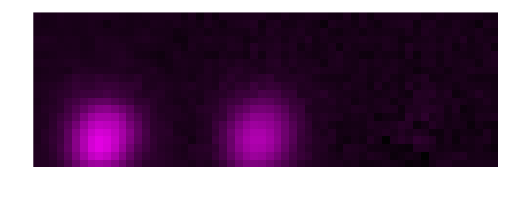

In [69]:
#Concatenate arrays and then scale

template=cutouts[8][0]
science=cutouts[8][1]
difference=cutouts[8][2]

stitched_array=np.concatenate((template,science,difference),axis=1)
Q=1
scaled=luptonRGB.makeRGB(stitched_array,Q)

plt.imshow(scaled,cmap=cm.viridis,interpolation="none",vmin=0,vmax=1)
plt.axis('off')